Wine Linear Regression RMSE: 0.4309
Wine Linear Regression R²: 0.6889


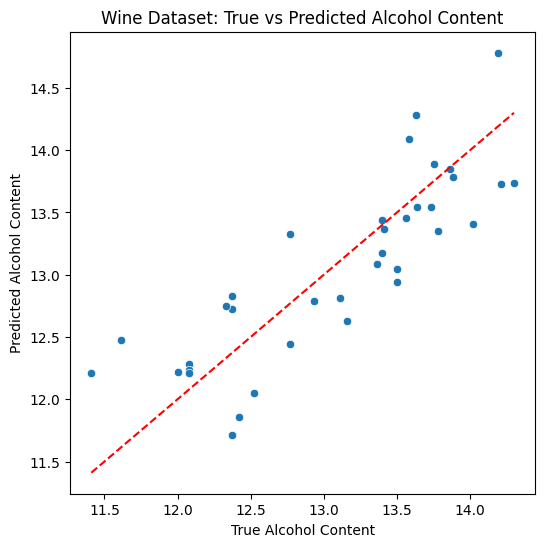

In [3]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names).drop(columns=['alcohol'])
y = wine.data[:, wine.feature_names.index('alcohol')]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Wine Linear Regression RMSE: {rmse:.4f}")
print(f"Wine Linear Regression R²: {r2:.4f}")


plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Alcohol Content')
plt.ylabel('Predicted Alcohol Content')
plt.title('Wine Dataset: True vs Predicted Alcohol Content')
plt.show()